# 04_Medication and Treatment Outcomes

            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

<Figure size 1400x800 with 0 Axes>

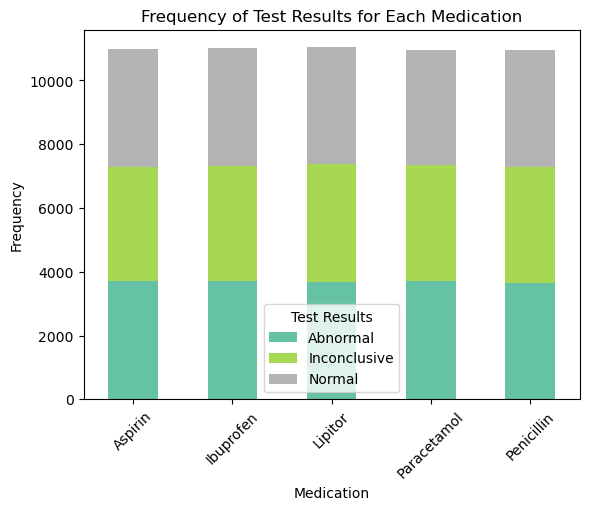

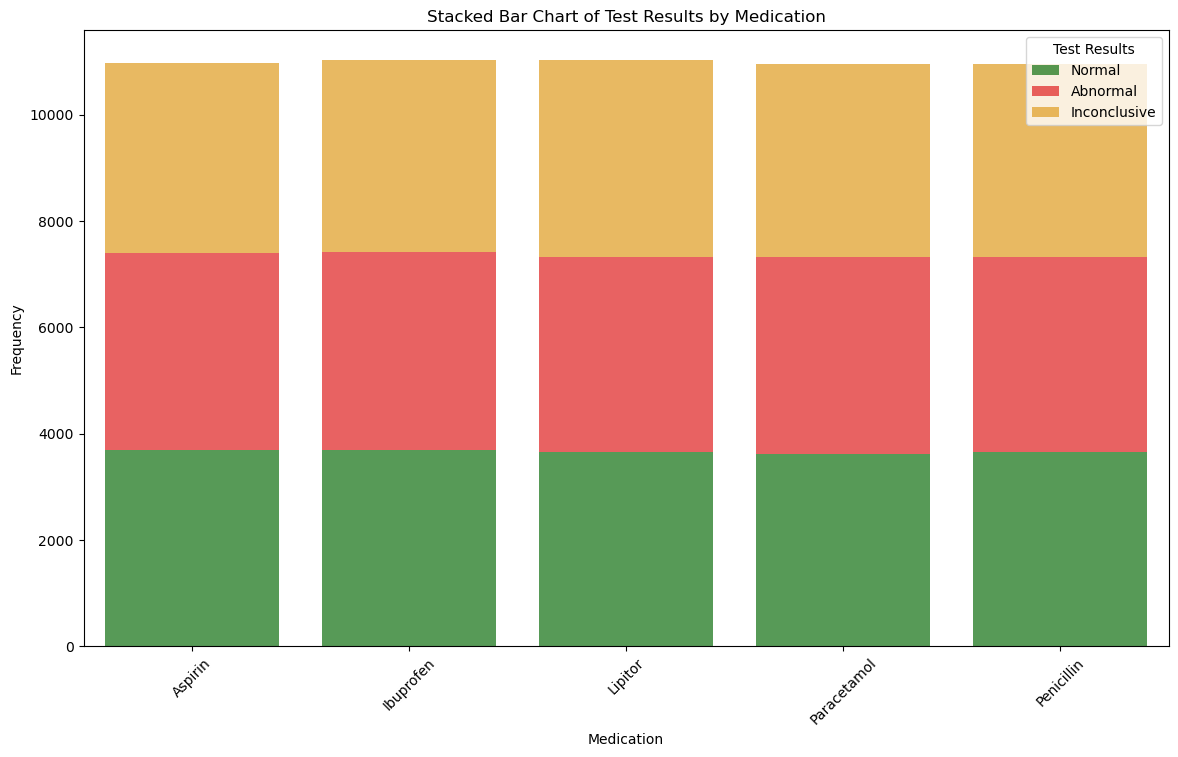

In [2]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('healthcare_dataset.csv')

# Data overview
print(df.head())
print(df.info())
print(df.describe())

# Data cleaning
df = df.drop_duplicates()
print(df.isnull().sum())
df = df.dropna(subset=['Medication', 'Test Results'])

# Count occurrences of each test result for each medication
medication_test_results = df.groupby(['Medication', 'Test Results']).size().unstack().fillna(0)

# Bar plot of test results by medication
plt.figure(figsize=(14, 8))
medication_test_results.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Frequency of Test Results for Each Medication')
plt.xlabel('Medication')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Test Results')
plt.show()

# Stacked bar chart of test results by medication
plt.figure(figsize=(14, 8))
sbn.barplot(x=medication_test_results.index, y=medication_test_results['Normal'], color='green', label='Normal', alpha=0.7)
sbn.barplot(x=medication_test_results.index, y=medication_test_results['Abnormal'], color='red', label='Abnormal', alpha=0.7, bottom=medication_test_results['Normal'])
sbn.barplot(x=medication_test_results.index, y=medication_test_results['Inconclusive'], color='orange', label='Inconclusive', alpha=0.7, bottom=medication_test_results[['Normal', 'Abnormal']].sum(axis=1))
plt.title('Stacked Bar Chart of Test Results by Medication')
plt.xlabel('Medication')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Test Results')
plt.show()


In [4]:
# Summary of Findings
# Frequency of Test Results by Medication:

# The bar plot illustrates the distribution of test results (normal, abnormal, inconclusive) for each medication. This visualization helps identify which medications are associated with specific test outcomes.
# Stacked Bar Chart:

# The stacked bar chart provides a detailed view of how test results are distributed across different medications. It shows the proportion of each test result category for every medication, highlighting potential patterns or concerns.
# This analysis helps understand the effectiveness and outcomes associated with various medications, aiding in evaluating their performance and guiding treatment decisions.